In [4]:
!unzip '/content/open.zip'

Archive:  /content/open.zip
   creating: open/
  inflating: open/sample_submission.csv  
  inflating: open/test.csv           
  inflating: open/train.csv          


In [57]:
import pandas as pd
import numpy as np
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

In [58]:
# train_x는 독립변수이므로 종속변수(풍속 (m/s))를 제거합니다.
# 또한 target 이외의 분석에 활용하지 않는 데이터(id)를 제거합니다.
x_train = train.drop(columns=['ID', '풍속 (m/s)'], axis = 1)

# train_y는 종속변수로 값을 설정합니다.
y_train = train['풍속 (m/s)']
# train에서와 마찬가지로 분석에 활용하지 않는 데이터(id)를 제거합니다.
x_test = test.drop(columns=['ID'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(x_train['측정 시간대'])
x_train['측정 시간대'] = le.transform(x_train['측정 시간대'])
x_test['측정 시간대'] = le.transform(x_test['측정 시간대'])

In [11]:
!pip install -U mljar-supervised
from supervised.automl import AutoML
# 검증옵션
val_strategy = {
    'validation_type' : 'kfold',
    'k_folds' : 5,
    'shuffle' : True,
    "stratify": True
}

# automl 모델 생성
automl = AutoML(mode = 'Compete', eval_metric='mae', ml_task='regression', n_jobs=-1, validation_strategy=val_strategy)
automl.fit(x_train, y_train)

# 생성된 모델로 test 예측하기
pred = automl.predict(x_test)

3_DecisionTree mae 0.937128 trained in 2.39 seconds
* Step default_algorithms will try to check up to 7 models
4_Default_LightGBM mae 0.416515 trained in 181.46 seconds
5_Default_Xgboost mae 0.438852 trained in 166.07 seconds
6_Default_CatBoost mae 0.444629 trained in 254.19 seconds
7_Default_NeuralNetwork mae 0.744219 trained in 26.58 seconds
8_Default_RandomForest mae 0.900655 trained in 37.35 seconds
9_Default_ExtraTrees mae 0.954695 trained in 11.29 seconds
There was an error during 10_Default_NearestNeighbors training.
Please check AutoML_1/errors.md for details.
* Step not_so_random will try to check up to 63 models
19_LightGBM mae 0.443585 trained in 253.02 seconds
10_Xgboost mae 0.425295 trained in 120.31 seconds
28_CatBoost mae 0.450027 trained in 282.09 seconds
37_RandomForest mae 0.910057 trained in 45.26 seconds
46_ExtraTrees mae 0.957915 trained in 7.94 seconds
55_NeuralNetwork mae 0.770096 trained in 31.99 seconds
There was an error during 64_NearestNeighbors training.
Pl

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

4_Default_LightGBM_KMeansFeatures mae 0.414316 trained in 249.58 seconds
Not enough time to perform features selection. Skip
Time needed for features selection ~ 956.0 seconds
Please increase total_time_limit to at least (9625 seconds) to have features selection
Skip insert_random_feature because no parameters were generated.
Skip features_selection because no parameters were generated.
* Step hill_climbing_1 will try to check up to 29 models


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

56_LightGBM mae 0.420478 trained in 258.39 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

57_LightGBM mae 0.412221 trained in 238.52 seconds
* Step hill_climbing_2 will try to check up to 26 models


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

58_LightGBM mae 0.416039 trained in 138.83 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

59_LightGBM mae 0.418042 trained in 147.15 seconds
* Step boost_on_errors will try to check up to 1 model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

57_LightGBM_BoostOnErrors mae 0.413265 trained in 235.63 seconds
* Step ensemble will try to check up to 1 model
Ensemble mae 0.40257 trained in 2.08 seconds
* Step stack will try to check up to 20 models


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

57_LightGBM_Stacked mae 0.401775 trained in 39.64 seconds
10_Xgboost_Stacked mae 0.40144 trained in 24.73 seconds
6_Default_CatBoost_Stacked mae 0.402141 trained in 24.82 seconds
7_Default_NeuralNetwork_Stacked mae 0.408507 trained in 24.35 seconds
8_Default_RandomForest_Stacked not trained. Stop training after the first fold. Time needed to train on the first fold 51.0 seconds. The time estimate for training on all folds is larger than total_time_limit.
9_Default_ExtraTrees_Stacked mae 0.404892 trained in 40.05 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

4_Default_LightGBM_KMeansFeatures_Stacked mae 0.401524 trained in 33.11 seconds
11_Xgboost_Stacked mae 0.40268 trained in 25.89 seconds
28_CatBoost_Stacked mae 0.400765 trained in 79.77 seconds
* Step ensemble_stacked will try to check up to 1 model
Ensemble_Stacked mae 0.398756 trained in 3.62 seconds
AutoML fit time: 3633.14 seconds
AutoML best model: Ensemble_Stacked


In [14]:
submission = pd.read_csv('./open/sample_submission.csv')
submission['풍속 (m/s)'] = pred
submission.head()
submission.to_csv('submission.csv', index=  False)

참고자료
  - https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

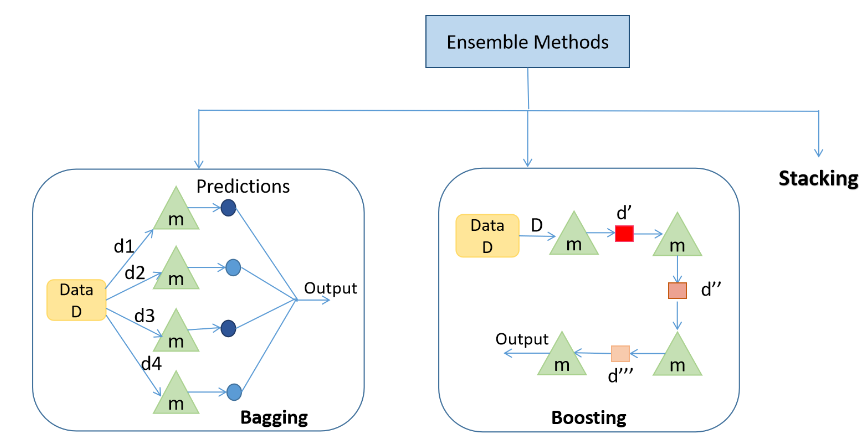

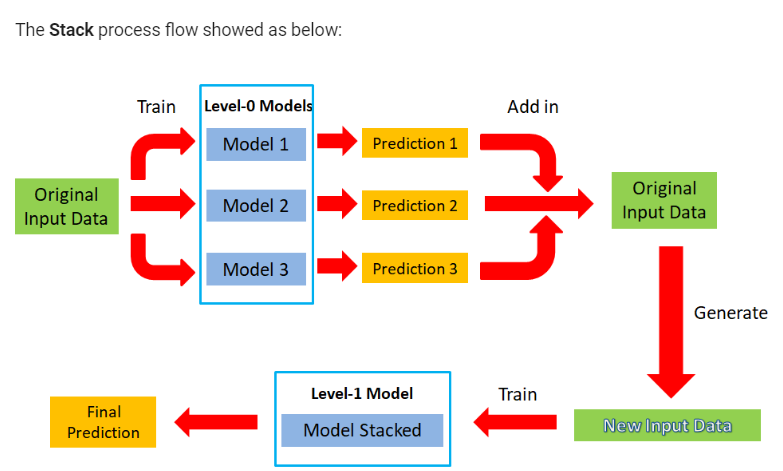

최상의 모델 찾은다음
  - 데이터전처리
  - optuna를 이용해 튜닝
  - 파이프라인을 구축해서 한번에 다시 학습
  - 결과
  - 성능향상
    - poly 증가    
    - 상위 3개모델 선택해서 앙상블 과 스태킹

In [67]:
automl.report()

TypeError: ignored

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=3)),
    ('model', automl)
])
pipeline.fit(x_train,y_train)
pred = pipeline.predict(x_test)

# submission = pd.read_csv('./open/sample_submission2.csv')
# submission['풍속 (m/s)'] = pred
# submission.head()
# submission.to_csv('submission.csv', index=  False)

In [64]:
ss = StandardScaler().fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)